# Assignment 2 - Insurance Prediction using Logistic Regression 

### i) import Libraries and Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [3]:
info=pd.read_csv("Insurance .csv")

In [4]:
info

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0


###  only 5 rows or last 5

In [5]:
info.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [6]:
info.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0
381108,381109,Male,46,1,29,0,1-2 Year,No,41777,26,237,0


In [7]:
info.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0
5,6,Female,24,1,33,0,< 1 Year,Yes,2630,160,176,0
6,7,Male,23,1,11,0,< 1 Year,Yes,23367,152,249,0
7,8,Female,56,1,28,0,1-2 Year,Yes,32031,26,72,1
8,9,Female,24,1,3,1,< 1 Year,No,27619,152,28,0
9,10,Female,32,1,6,1,< 1 Year,No,28771,152,80,0


In [8]:
info.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381099,381100,Female,51,1,28,0,1-2 Year,Yes,44504,26,71,0
381100,381101,Female,29,1,28,0,< 1 Year,Yes,49007,124,137,0
381101,381102,Female,70,1,28,0,> 2 Years,Yes,50904,122,215,0
381102,381103,Female,25,1,41,1,< 1 Year,Yes,2630,152,102,0
381103,381104,Male,47,1,50,0,1-2 Year,Yes,39831,26,235,0
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0
381108,381109,Male,46,1,29,0,1-2 Year,No,41777,26,237,0


### ii) Data Wrangling

In [9]:
info.shape

(381109, 12)

In [10]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [12]:

info['Gender']=info['Gender'].replace({'Male':1,'Female':0})
info['Vehicle_Age']=info['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
info['Vehicle_Damage']=info['Vehicle_Damage'].replace({'Yes':1,'No':0})

In [13]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   id                    381109 non-null  int64
 1   Gender                381109 non-null  int64
 2   Age                   381109 non-null  int64
 3   Driving_License       381109 non-null  int64
 4   Region_Code           381109 non-null  int64
 5   Previously_Insured    381109 non-null  int64
 6   Vehicle_Age           381109 non-null  int64
 7   Vehicle_Damage        381109 non-null  int64
 8   Annual_Premium        381109 non-null  int64
 9   Policy_Sales_Channel  381109 non-null  int64
 10  Vintage               381109 non-null  int64
 11  Response              381109 non-null  int64
dtypes: int64(12)
memory usage: 34.9 MB


In [14]:
info.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [15]:
info.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [16]:
#1- taken Insurance #0- not taken Insurance
info['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [17]:
#splitting the features and Targets (y is output) 
x = info.drop(columns='Response',axis=1)
y = info['Response']

In [18]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

### iii) Data Visualization

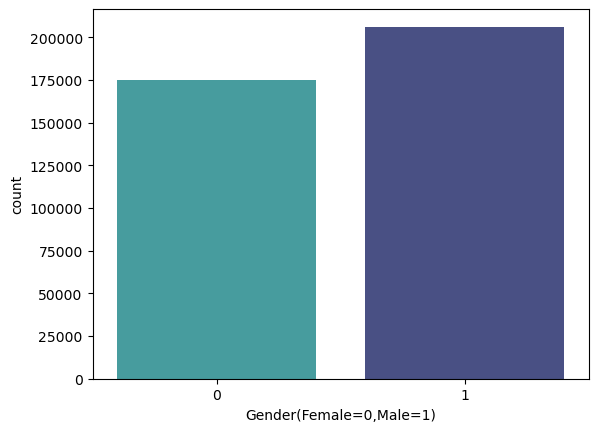

In [20]:
sns.countplot(x='Gender',data=info , palette="mako_r")
plt.xlabel("Gender(Female=0,Male=1)")
plt.show()

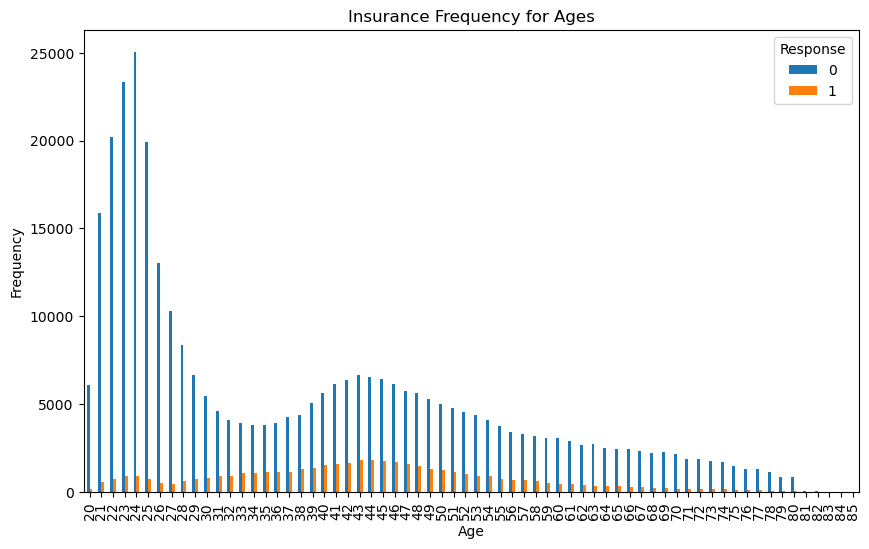

In [22]:
pd.crosstab(info.Age,info.Response).plot(kind="bar",figsize=(10,6))
plt.title('Insurance Frequency for Ages')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('Insurance_Prediction_and_age.png')
plt.show()

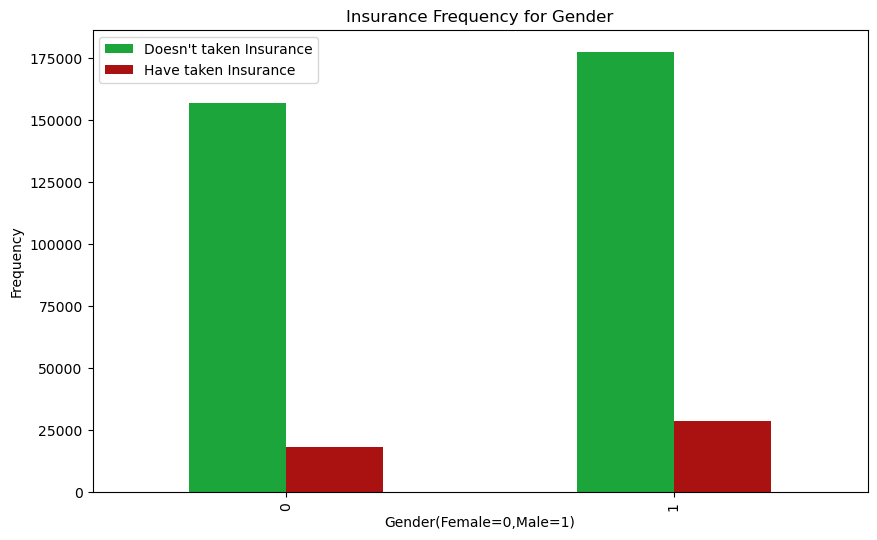

In [23]:
pd.crosstab(info.Gender,info.Response).plot(kind="bar",figsize=(10,6), color=['#1CA53B','#AA1111'])
plt.title('Insurance Frequency for Gender')
plt.xlabel("Gender(Female=0,Male=1)")
plt.legend(["Doesn't taken Insurance","Have taken Insurance"])
plt.ylabel("Frequency")
plt.savefig('Insurance_and_Gender.png')
plt.show()

### iv) Splitting the Data into Training and Testing Data 

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [25]:
print(x.shape,x_train.shape,x_test.shape)

(381109, 11) (304887, 11) (76222, 11)


### v)Logistic Regression Model


In [26]:
model=LogisticRegression()

In [27]:
model.fit(x_train,y_train)

LogisticRegression()

### vi)Model evaluation for Accuracy Score
     

          Training Data

In [28]:
x_train_prediction=model.predict(x_train)
training_data_accuracy= accuracy_score(x_train_prediction,y_train)
print("Accuracy on Training Data :",training_data_accuracy)

Accuracy on Training Data : 0.8774365584626436


        Testing data 

In [29]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy= accuracy_score(x_test_prediction,y_test)
print("Accuracy on Testing Data :",testing_data_accuracy)

Accuracy on Testing Data : 0.8774369604576107


### vii) Build Predictive System

In [32]:
input_data=(12,0,24,1,50,1,0,0,48699,152,289)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] ==0):
    print("The person have NOT taken a Insurance")
else:
    print("The person have taken a Insurance")

[0]
The person have NOT taken a Insurance


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [34]:
input_data=(20,0,60,1,33,0,1,32363,124,102,1)
 
input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0] ==0):
    print("The person have NOT taken a Insurance")
else:
    print("The person have taken a Insurance")

[1]
The person have taken a Insurance


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
